In [18]:
#import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [7]:
# data processing

#duplicates
print("number of dupliuctes in train ",sum(train.duplicated()))
print("number of dupliuctes in train ",sum(test.duplicated()))


#missing values
print('missing values in train :',train.isna().values.sum())
print('missing values in test :',test.isna().values.sum())


number of dupliuctes in train  0
number of dupliuctes in train  0
missing values in train : 0
missing values in test : 0


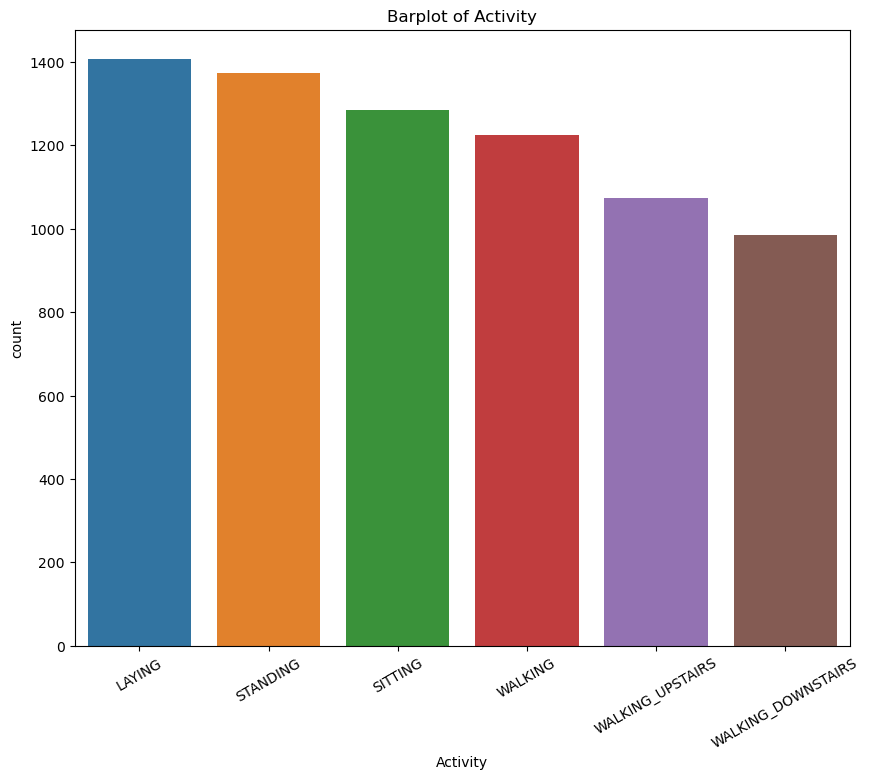

In [8]:
plt.figure(figsize=(10,8))
plt.title("Barplot of Activity")

sns.countplot(data=train, x=pd.Series(train.Activity), order=train.Activity.value_counts().index)
plt.xticks(rotation=30)
plt.show()


In [9]:
counter_dict = Counter(col.split('-')[0].split('(')[0] for col in train.columns)
df = pd.DataFrame.from_dict(counter_dict, orient='index')
df = df.rename(columns={0: 'Count'}).sort_values('Count', ascending=False)
df

,Count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


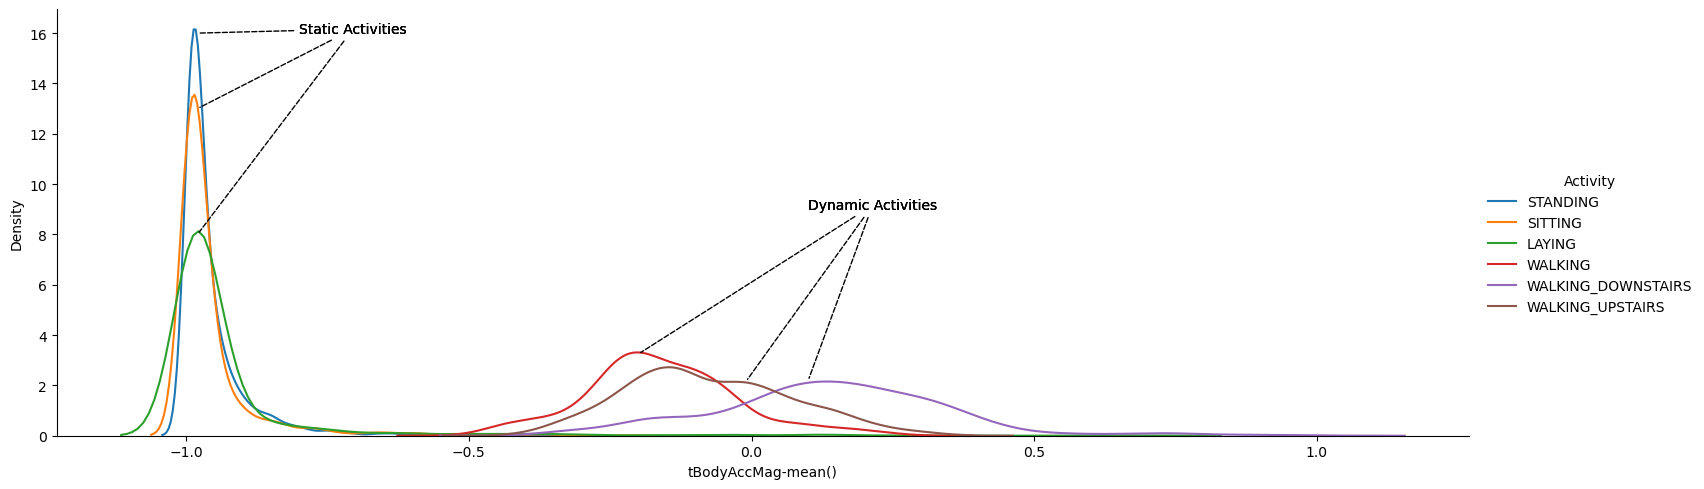

In [10]:
facetGrid=sns.FacetGrid(train,hue = 'Activity',height=5,aspect=3)
facetGrid.map(sns.distplot,'tBodyAccMag-mean()',hist=False).add_legend()

plt.annotate("Static Activities",xy=(-.98,8),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activities",xy=(-.98,13),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activities",xy=(-.98,16),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})


plt.annotate("Dynamic Activities",xy=(-0.2,3.25),xytext=(0.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activities",xy=(0.1,2.18),xytext=(0.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activities",xy=(-0.01,2.15),xytext=(0.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.show()

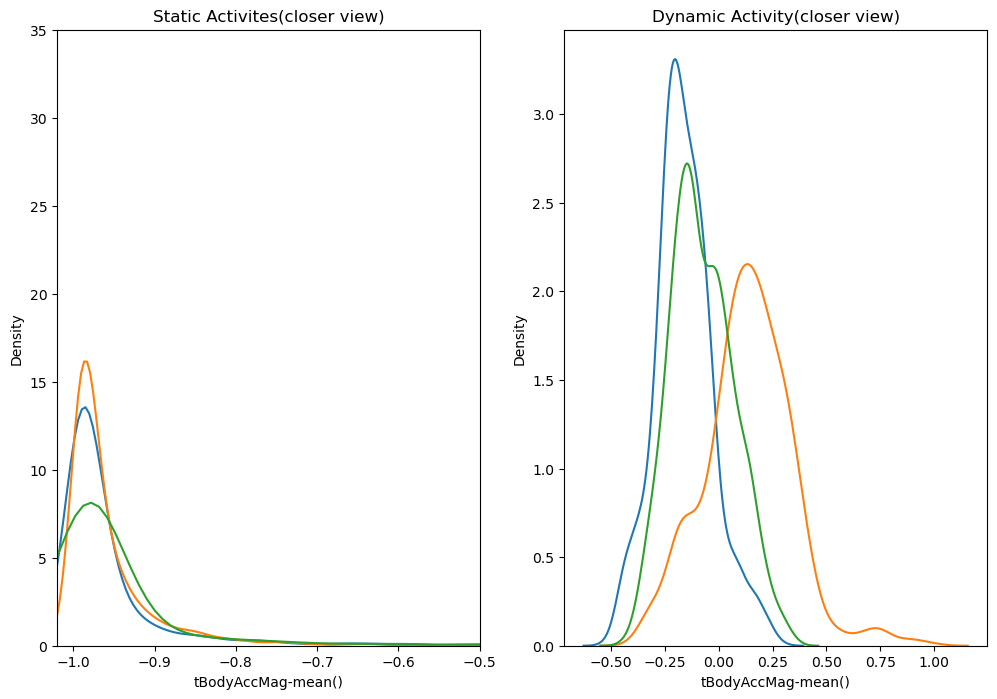

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activites(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist=False,label='Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist=False,label='STANDING')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist=False,label='Laying')

plt.axis([-1.02,-0.5,0,35])
plt.subplot(1,2,2)
plt.title("Dynamic Activity(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist=False,label='WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist=False,label='WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist=False,label='WALKING_UPSTAIRS')
plt.show()


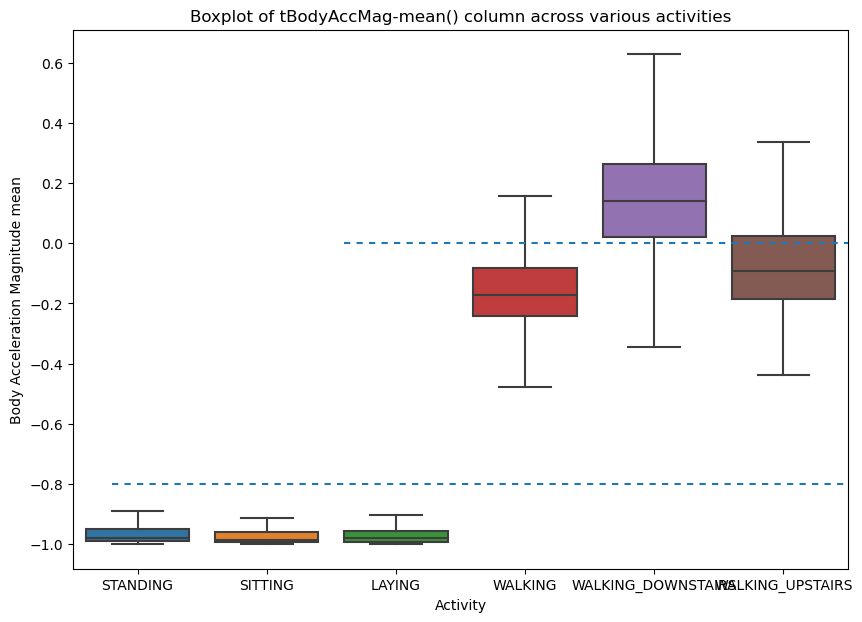

In [12]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="Activity", y="tBodyAccMag-mean()", data=train, showfliers=False)
plt.ylabel("Body Acceleration Magnitude mean")
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-0.8, xmin=0.05, dashes=(3, 3))
plt.axhline(y=0.0, xmin=0.35, linestyle='--', dashes=(3, 3))
plt.show()

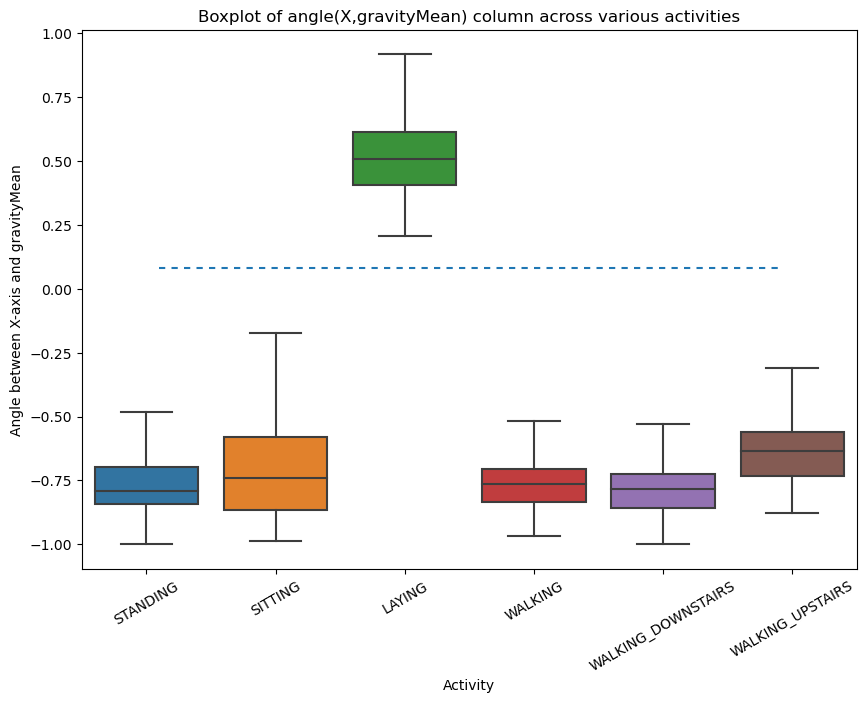

In [13]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="Activity", y="angle(X,gravityMean)", data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1,xmax=0.9, dashes=(3, 3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title("Boxplot of angle(X,gravityMean) column across various activities")

plt.xticks(rotation=30)
plt.show()

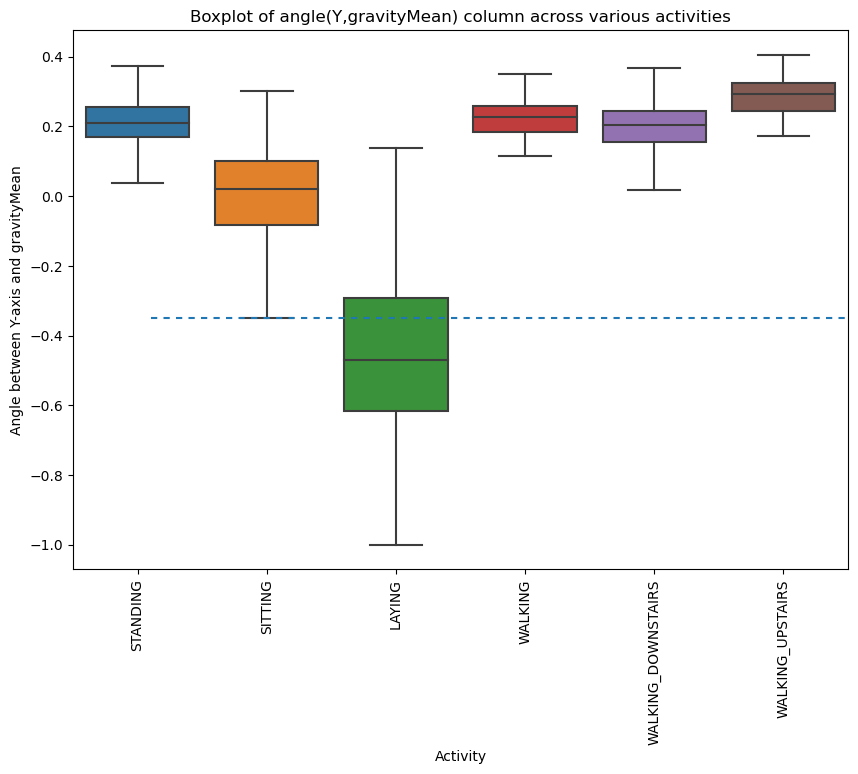

In [14]:
#Analysing angle between y-axis and gravityMean feature

plt.figure(figsize=(10, 7))
sns.boxplot(x="Activity", y="angle(Y,gravityMean)", data=train, showfliers=False)

plt.ylabel("Angle between Y-axis and gravityMean")
plt.title("Boxplot of angle(Y,gravityMean) column across various activities")

plt.xticks(rotation=90)
plt.axhline(y=-0.35, xmin=0.1,dashes=(3, 3))
plt.show()

In [16]:
#visualizing data using PCA

x_for_pca=train.drop(['subject','Activity'],axis=1)
pca=PCA(n_components=2,random_state=0).fit_transform(x_for_pca)


In [17]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

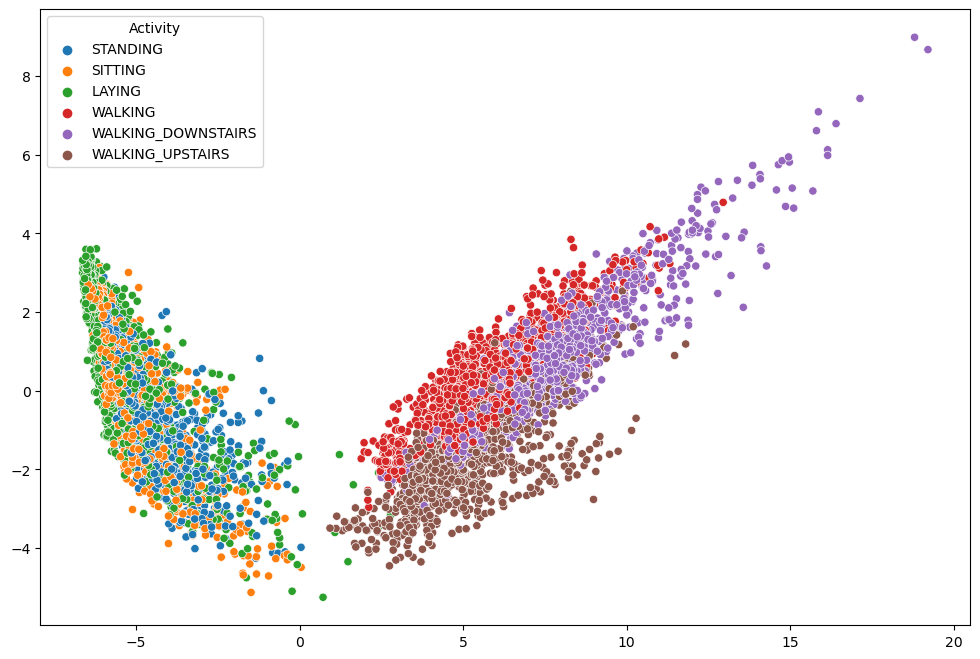

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train["Activity"])
plt.show()

In [24]:
#t-SNE

x_for_tsne=train.drop(['subject','Activity'],axis=1)
tsne=TSNE(n_components=2,random_state=0,n_iter=1000).fit_transform(x_for_tsne)

In [25]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

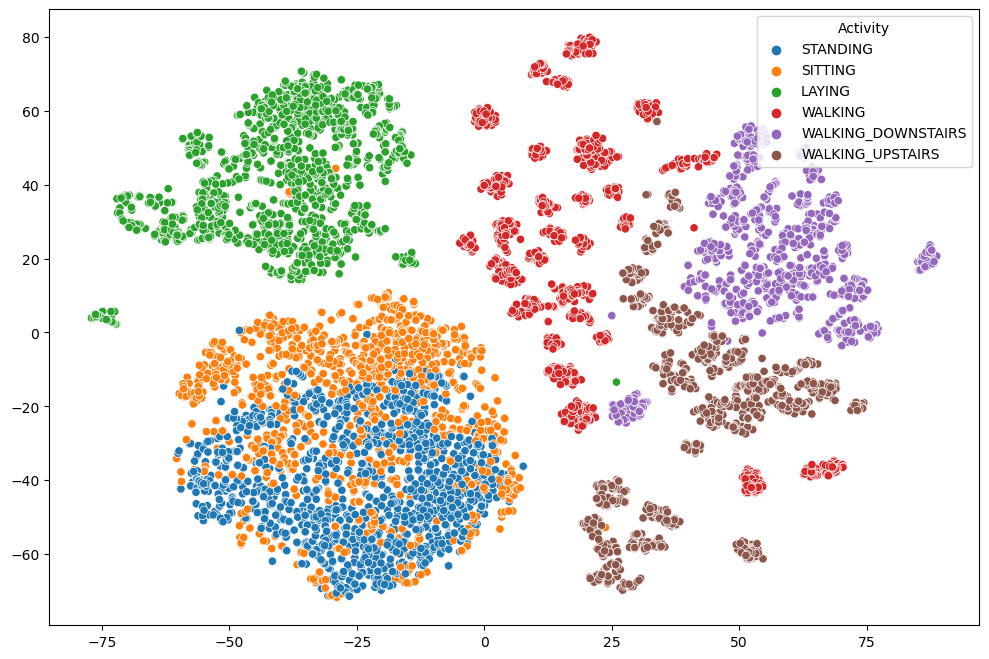

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tsne[:, 0],y=tsne[:, 1],hue=train["Activity"])
plt.show()

In [27]:
#ML MODELS

x_train=train.drop(["subject","Activity"],axis=1)
y_train=train.Activity

x_test=test.drop(["subject","Activity"],axis=1)
y_test=test.Activity

print('training data size: ',x_train.shape)
print('test data size: ',x_test.shape)

training data size:  (7352, 561)
test data size:  (999, 561)


In [34]:
# logistic regression model with hyperparametertuning and cross validation

parameters={'max_iter':[100,200,500]}
lr_classifier=LogisticRegression()
lr_classifier_rs=RandomizedSearchCV(lr_classifier,param_distributions=parameters,cv=5,random_state=42)
lr_classifier_rs.fit(x_train,y_train)
y_pred_lr=lr_classifier_rs.predict(x_test)



In [35]:
lr_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred_lr)
print("Accuracy using Logistic Regression :",lr_accuracy)

Accuracy using Logistic Regression : 0.954954954954955


In [48]:
def plot_confusion_matrix(cm,labels):
    fig,ax=plt.subplots(figsize=(12,8))#plotting confusion matrix as image
    im=ax.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels,yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation=90)
    thresh=cm.max()/2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,int(cm[i,j]),ha='center',va='center',color='white' if cm[i,j]>thresh else 'black')
    fig.tight_layout()

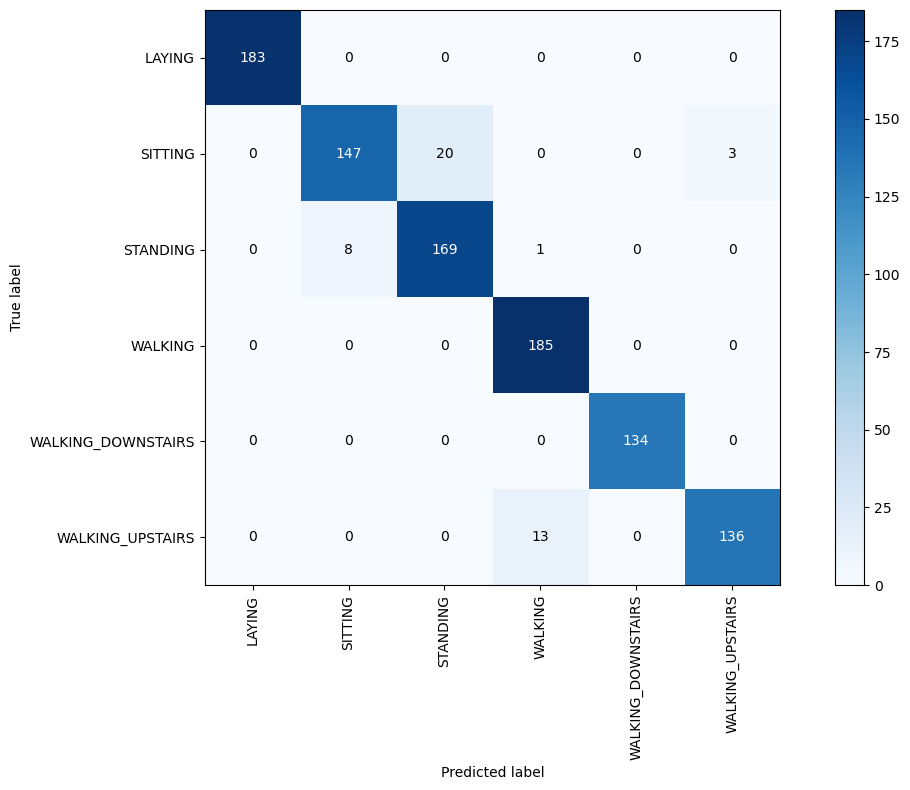

In [49]:
cm=confusion_matrix(y_test.values,y_pred_lr)
plot_confusion_matrix(cm,np.unique(y_pred_lr))

In [50]:
#function toget best random search attributes
def get_best_randomsearch_results(model):
    print("best estimator :",model.best_estimator_)
    print("best set of parameters :",model.best_params_)
    #print("best score :",model.best_score_)

In [52]:
get_best_randomsearch_results(lr_classifier_rs)


best estimator : LogisticRegression(max_iter=500)
best set of parameters : {'max_iter': 500}


In [56]:
#kernal svm model with hyperparamter tuning and cross validation

parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[100,50]}
svm_rs=RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=42)
svm_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [59]:
y_pred=svm_rs.predict(x_test)

In [60]:
kernel_svm_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print("Accuracy using kernal SVM :",kernel_svm_accuracy)

Accuracy using kernal SVM : 0.965965965965966


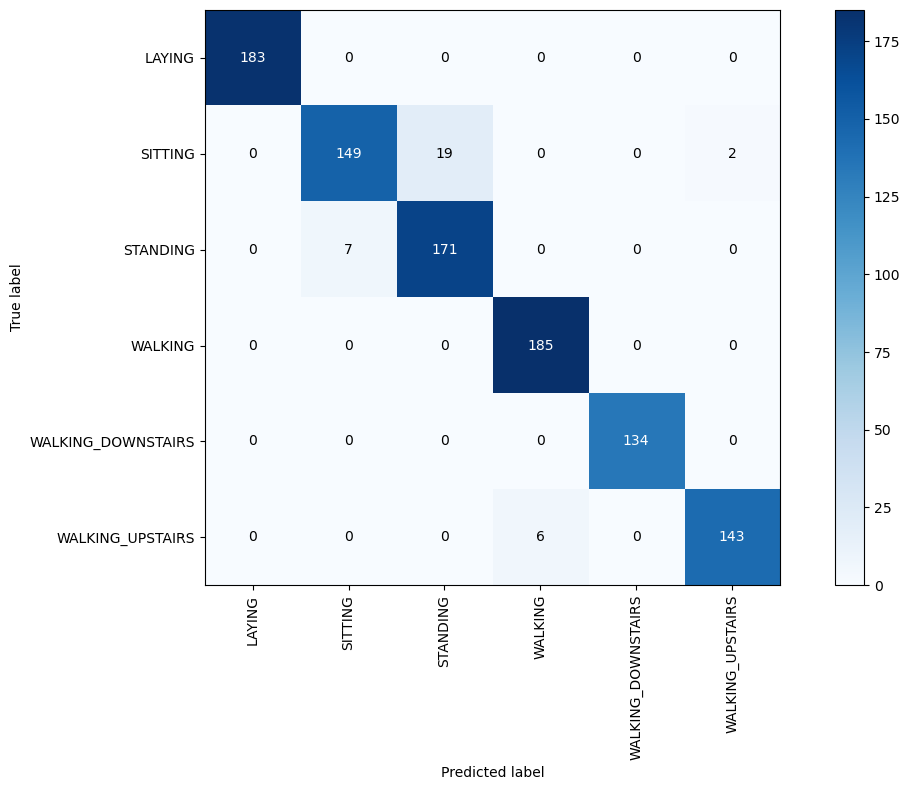

In [63]:
cm=confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [64]:
np.unique(y_pred)

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [66]:
get_best_randomsearch_results(svm_rs)

best estimator : SVC(C=50)
best set of parameters : {'kernel': 'rbf', 'C': 50}


In [69]:
#decsion tree model with hyperparameter tuning and cross validation

parametrs={'max_depth':np.arange(2,10,2)}

dt_classifier=DecisionTreeClassifier()
dt_classifier_rs=RandomizedSearchCV(dt_classifier,param_distributions=parametrs,random_state=42)
dt_classifier_rs.fit(x_train,y_train)


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [70]:
y_pred=dt_classifier_rs.predict(x_test)


In [71]:
dt_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print("Accuracy using Decision Tree :",dt_accuracy)

Accuracy using Decision Tree : 0.8508508508508509


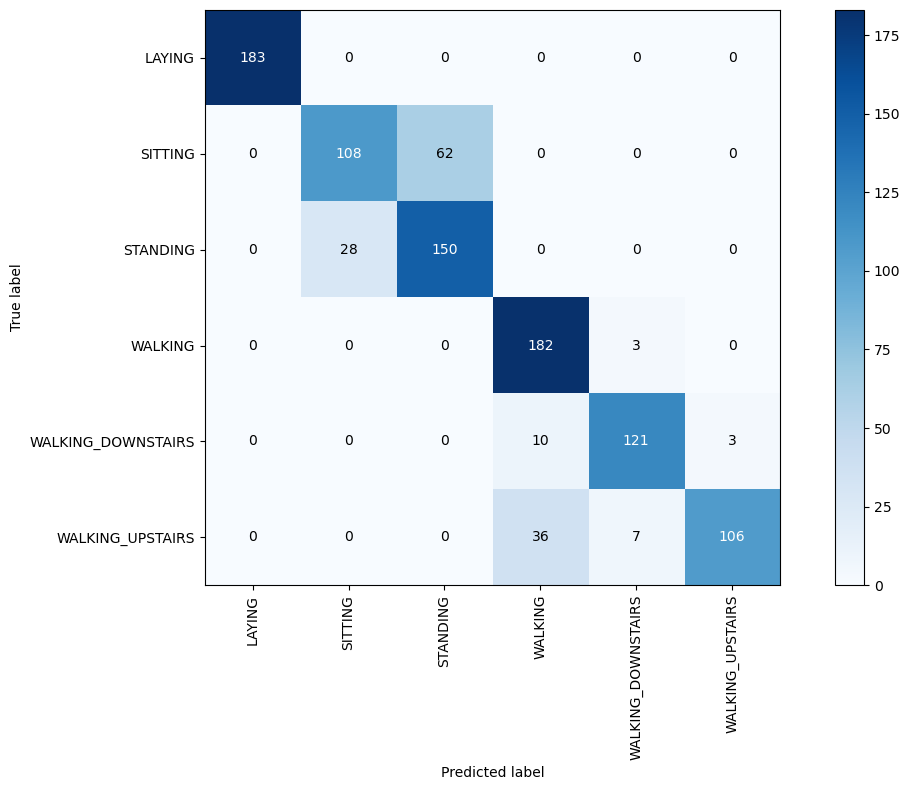

In [73]:
cm=confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [75]:
get_best_randomsearch_results(dt_classifier_rs)

best estimator : DecisionTreeClassifier(max_depth=8)
best set of parameters : {'max_depth': 8}


In [77]:
#random forest model with hyperparameter tuning and cross validation

parameters={'n_estimators':np.arange(20,101,10),'max_depth':np.arange(2,17,2)}

rf_classifier=RandomForestClassifier()
rf_classifier_rs=RandomizedSearchCV(rf_classifier,param_distributions=parameters,random_state=42)
rf_classifier_rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [79]:
get_best_randomsearch_results(rf_classifier_rs)


best estimator : RandomForestClassifier(max_depth=12, n_estimators=70)
best set of parameters : {'n_estimators': 70, 'max_depth': 12}


In [80]:
y_pred=rf_classifier_rs.predict(x_test)


In [81]:
rf_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print("Accuracy using Decision Tree :",rf_accuracy)

Accuracy using Decision Tree : 0.914914914914915


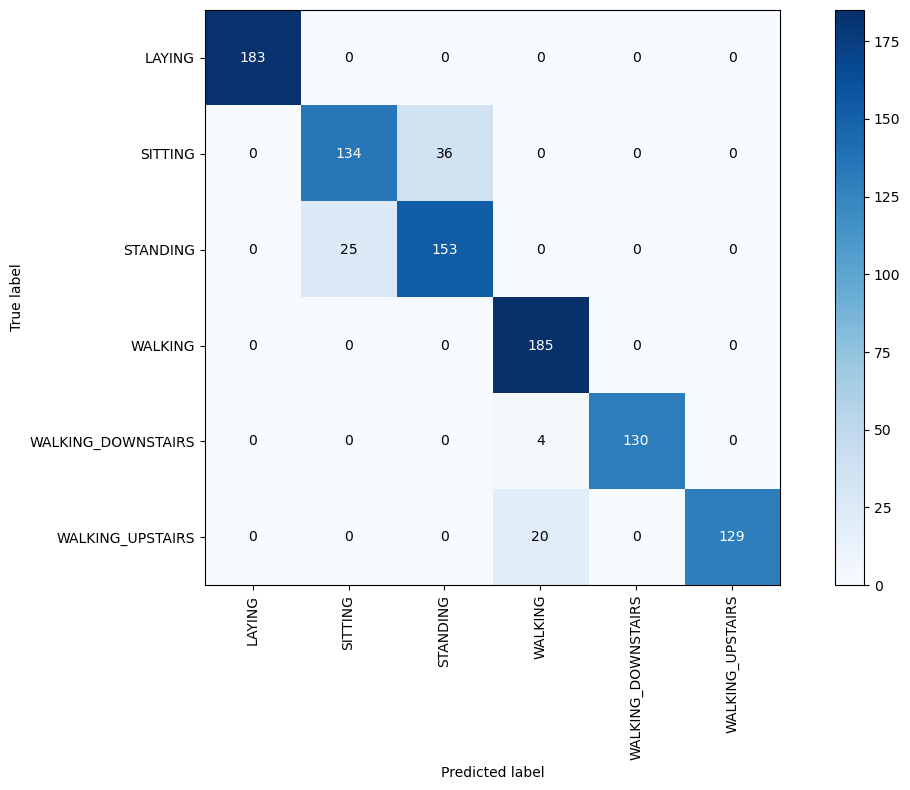

In [82]:
cm=confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))